## Build a Personality System


The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a taxonomy, or grouping, for personality traits. 

Using the Big Five Personality Dataset (collected from 2016-2018), I'll be building a personality system that divides people into 8 personality types. 8 is an arbitrary number, famous personality systems such as MBTI and Enneagram divides people into 16 and 9 personality types respectively, this is my personal preference. 

To do this I'll fit the data using the kmeans clustering algorithm.

### Data Exploration

In [1]:
# import libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read data into a dataframe called df
df  = pd.read_csv("data-final.csv", delimiter="\t")

In [5]:
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


In [9]:
columns = df.columns
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


Columns 1 to 50 represent the test questions outlined in the code book. 1-10 extrovert, 11-20 neurotic, 21-30 agreeable, 31-40 conscientious, 41-50 open to new experiences

The each item is rated on a 1-5 scale.

The remaining columns contain metadata.

Get the 1st through 50th columns with no metadata.

In [28]:
cols = df[df.columns[0:50]]
cols.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [29]:
#display all columns
pd.set_option("display.max_columns", None)
cols

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [30]:
#check for missing values and confirm number of datapoints
print('Number of participants: ', len(cols))
print('Missing values in the set ', cols.isnull().values.any())
print('Number of missing values ', cols.isnull().values.sum()) 

Number of participants:  1015341
Missing values in the set  True
Number of missing values  89150


In [31]:
#put a 0 where there are missing values
cols = cols.fillna(0)

In [33]:
cols.shape

(1015341, 50)

Now let's understand the questions and how they are grouped and then visualize the results

**remember the results are defined on 1-5 scale**

In [34]:
#Questions
extrovert = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

neurotic = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agreeable = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

conscientious = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

openness = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in cols if column.startswith('EXT')]
EST = [column for column in cols if column.startswith('EST')]
AGR = [column for column in cols if column.startswith('AGR')]
CSN = [column for column in cols if column.startswith('CSN')]
OPN = [column for column in cols if column.startswith('OPN')]

In [71]:
#define a funtion that takes groups, questions and colors for visualization
def results(group, questions, color):
    plt.figure(figsize=(40,100))
    for i in range(0,10):
        plt.subplot(10,3,i+1)
        plt.hist(cols[group[i]], bins=14, color= color, alpha=.5)
        plt.title(questions[group[i]], fontsize=38)

Extroversion


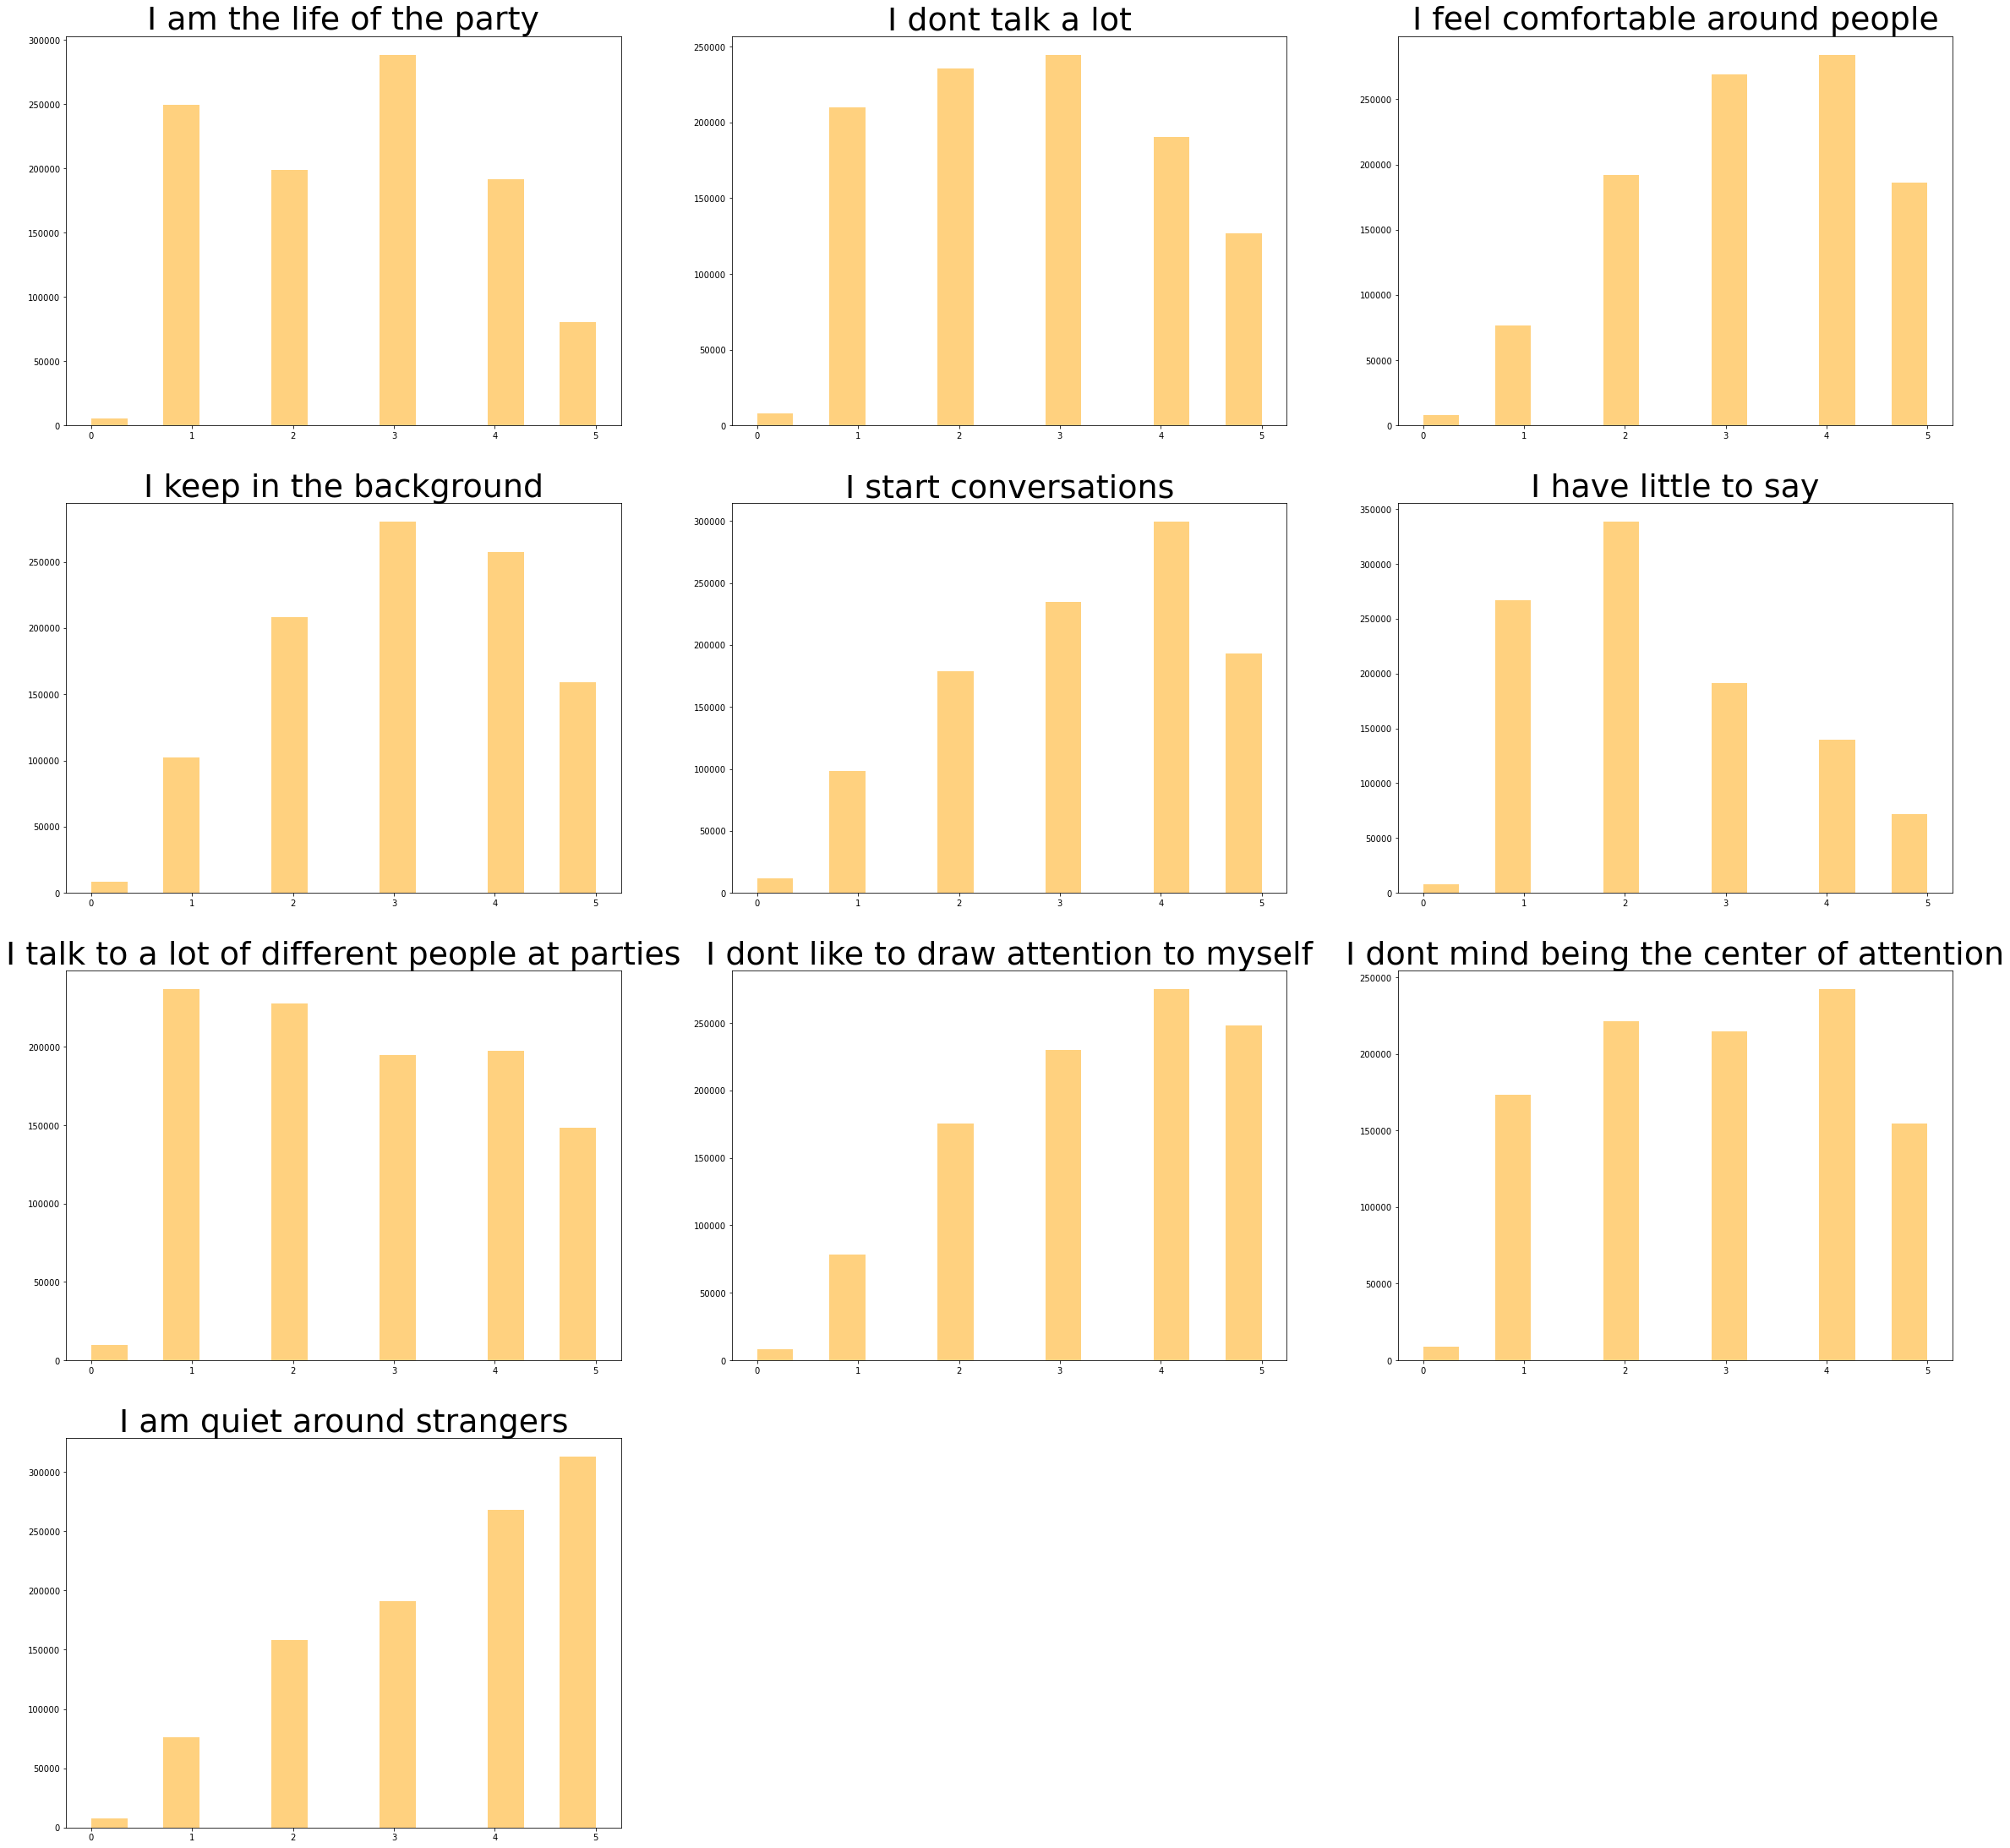

In [72]:
print('Extroversion')
results(EXT, extrovert, 'orange')

Neuroticism


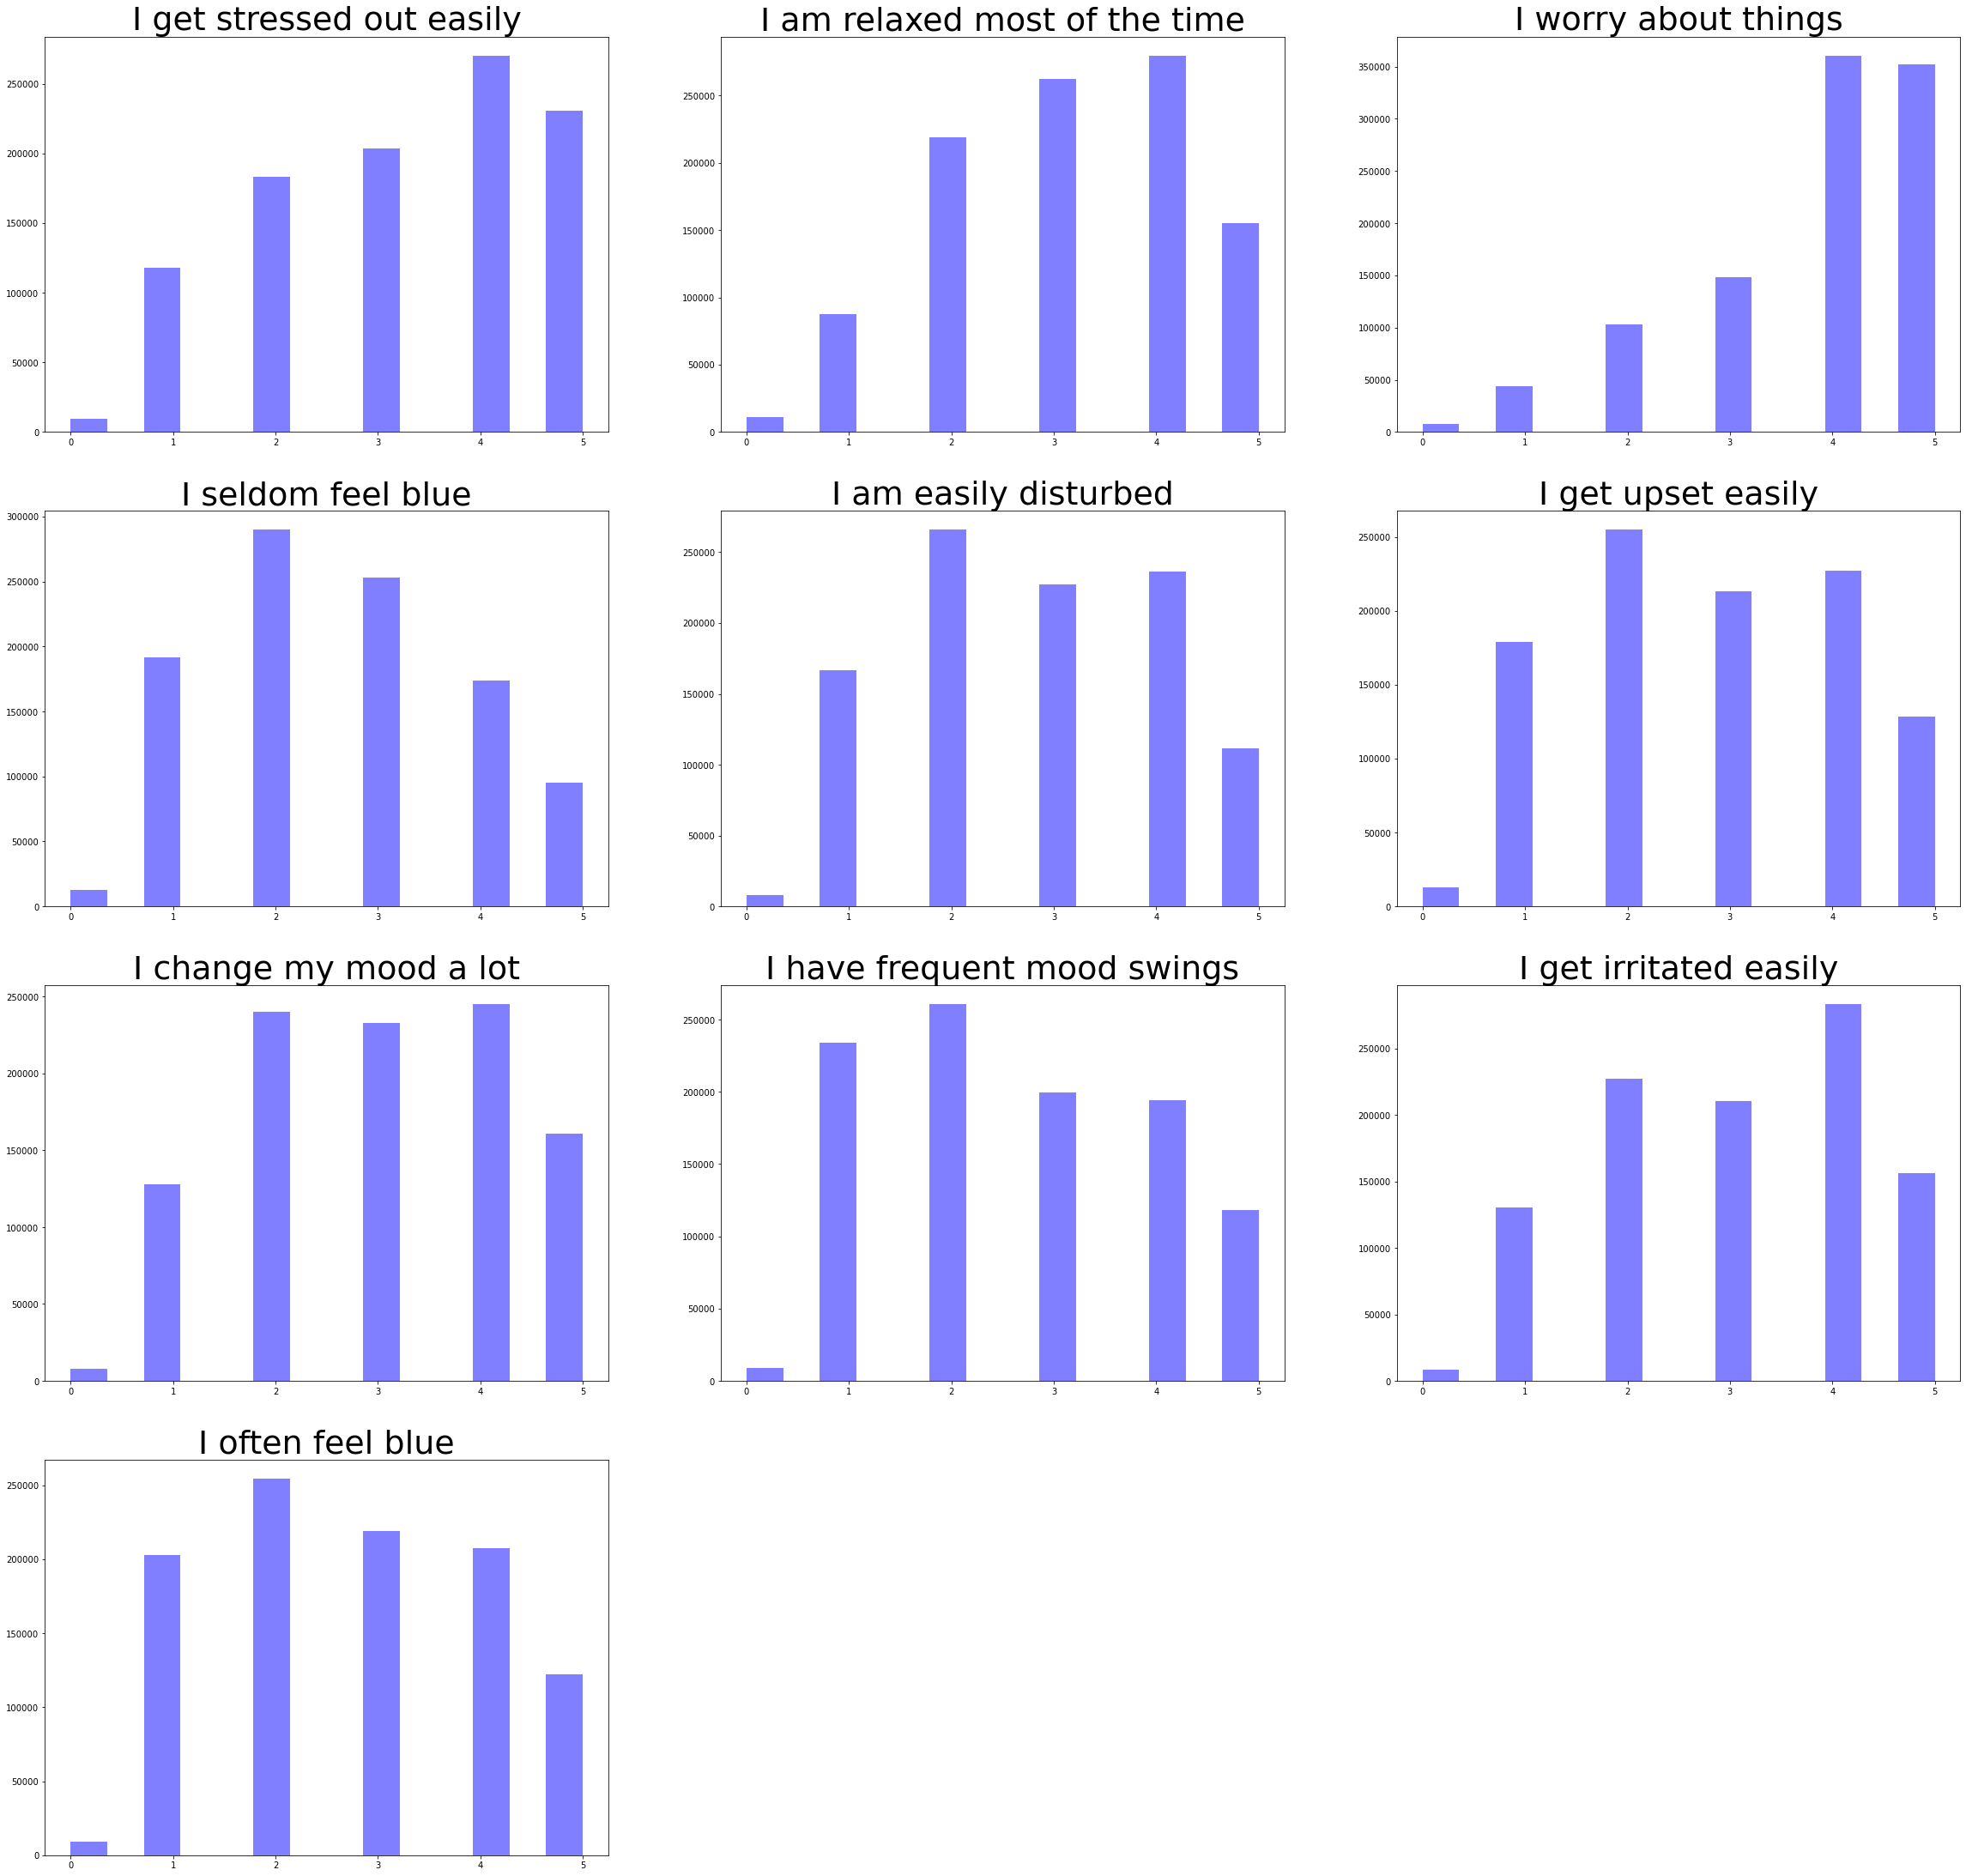

In [74]:
print('Neuroticism')
results(EST, neurotic, 'blue')

Agreeable


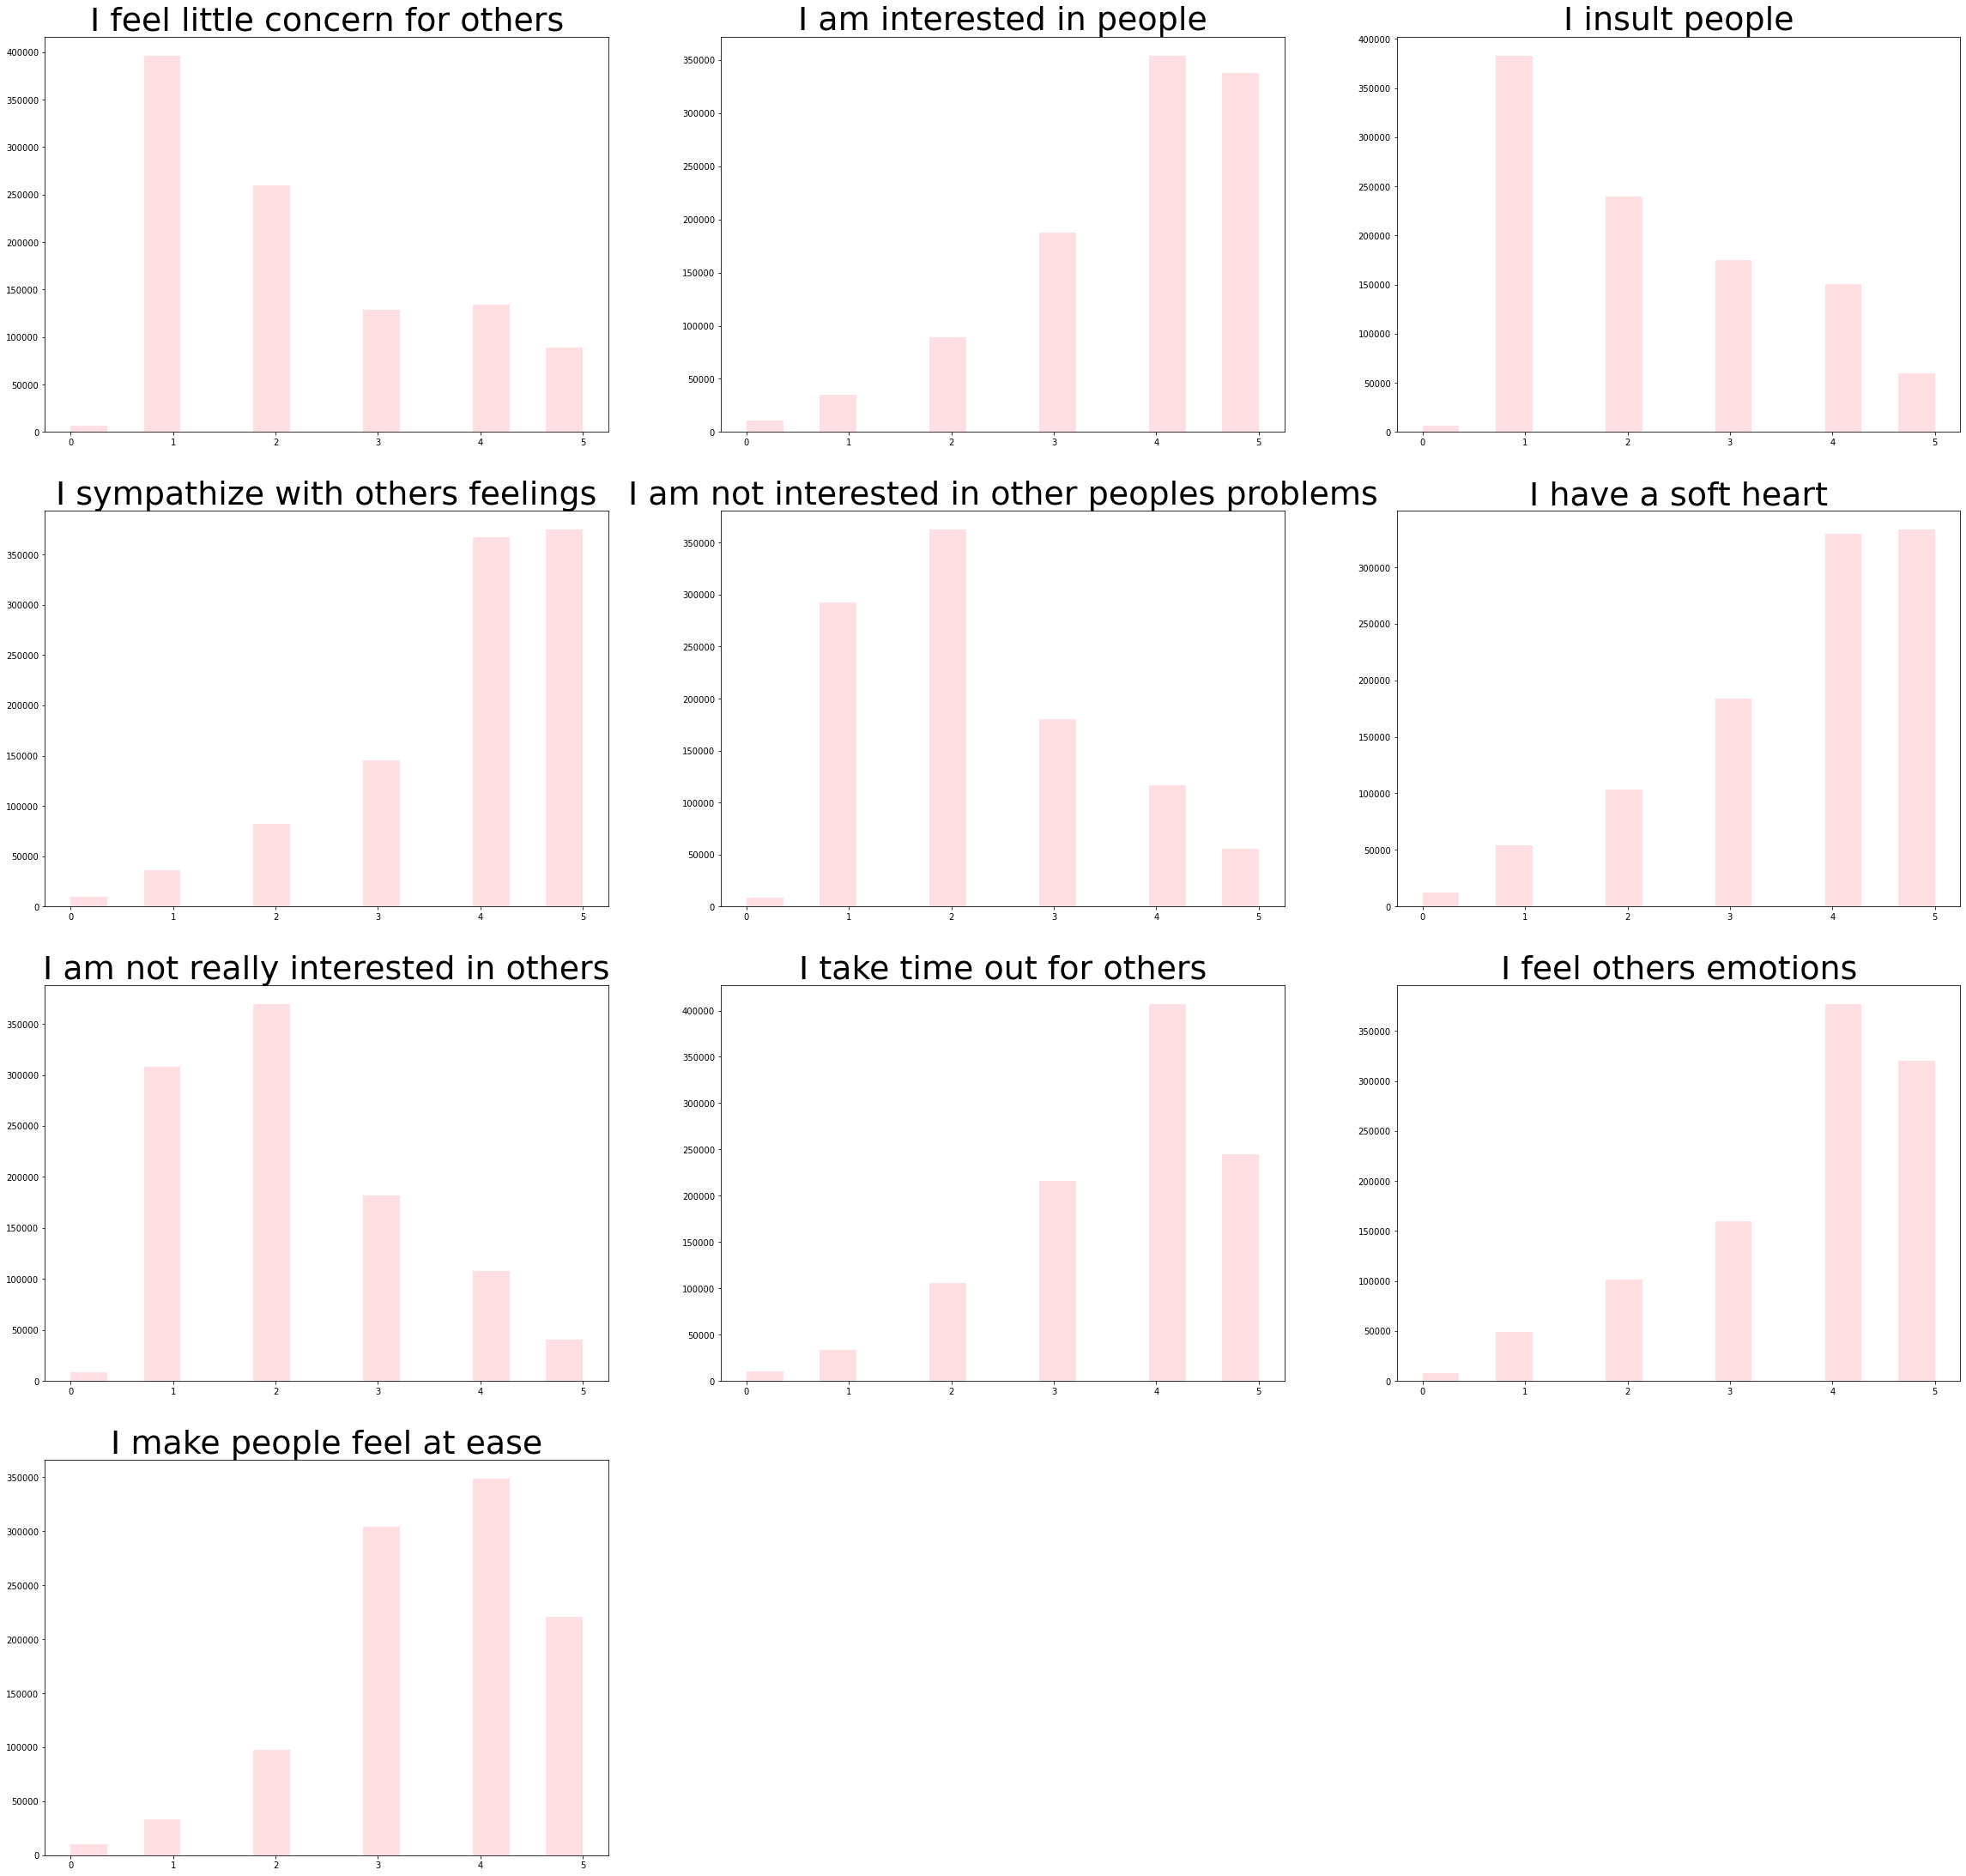

In [75]:
print('Agreeable')
results(AGR, agreeable, 'pink')

Conscientious


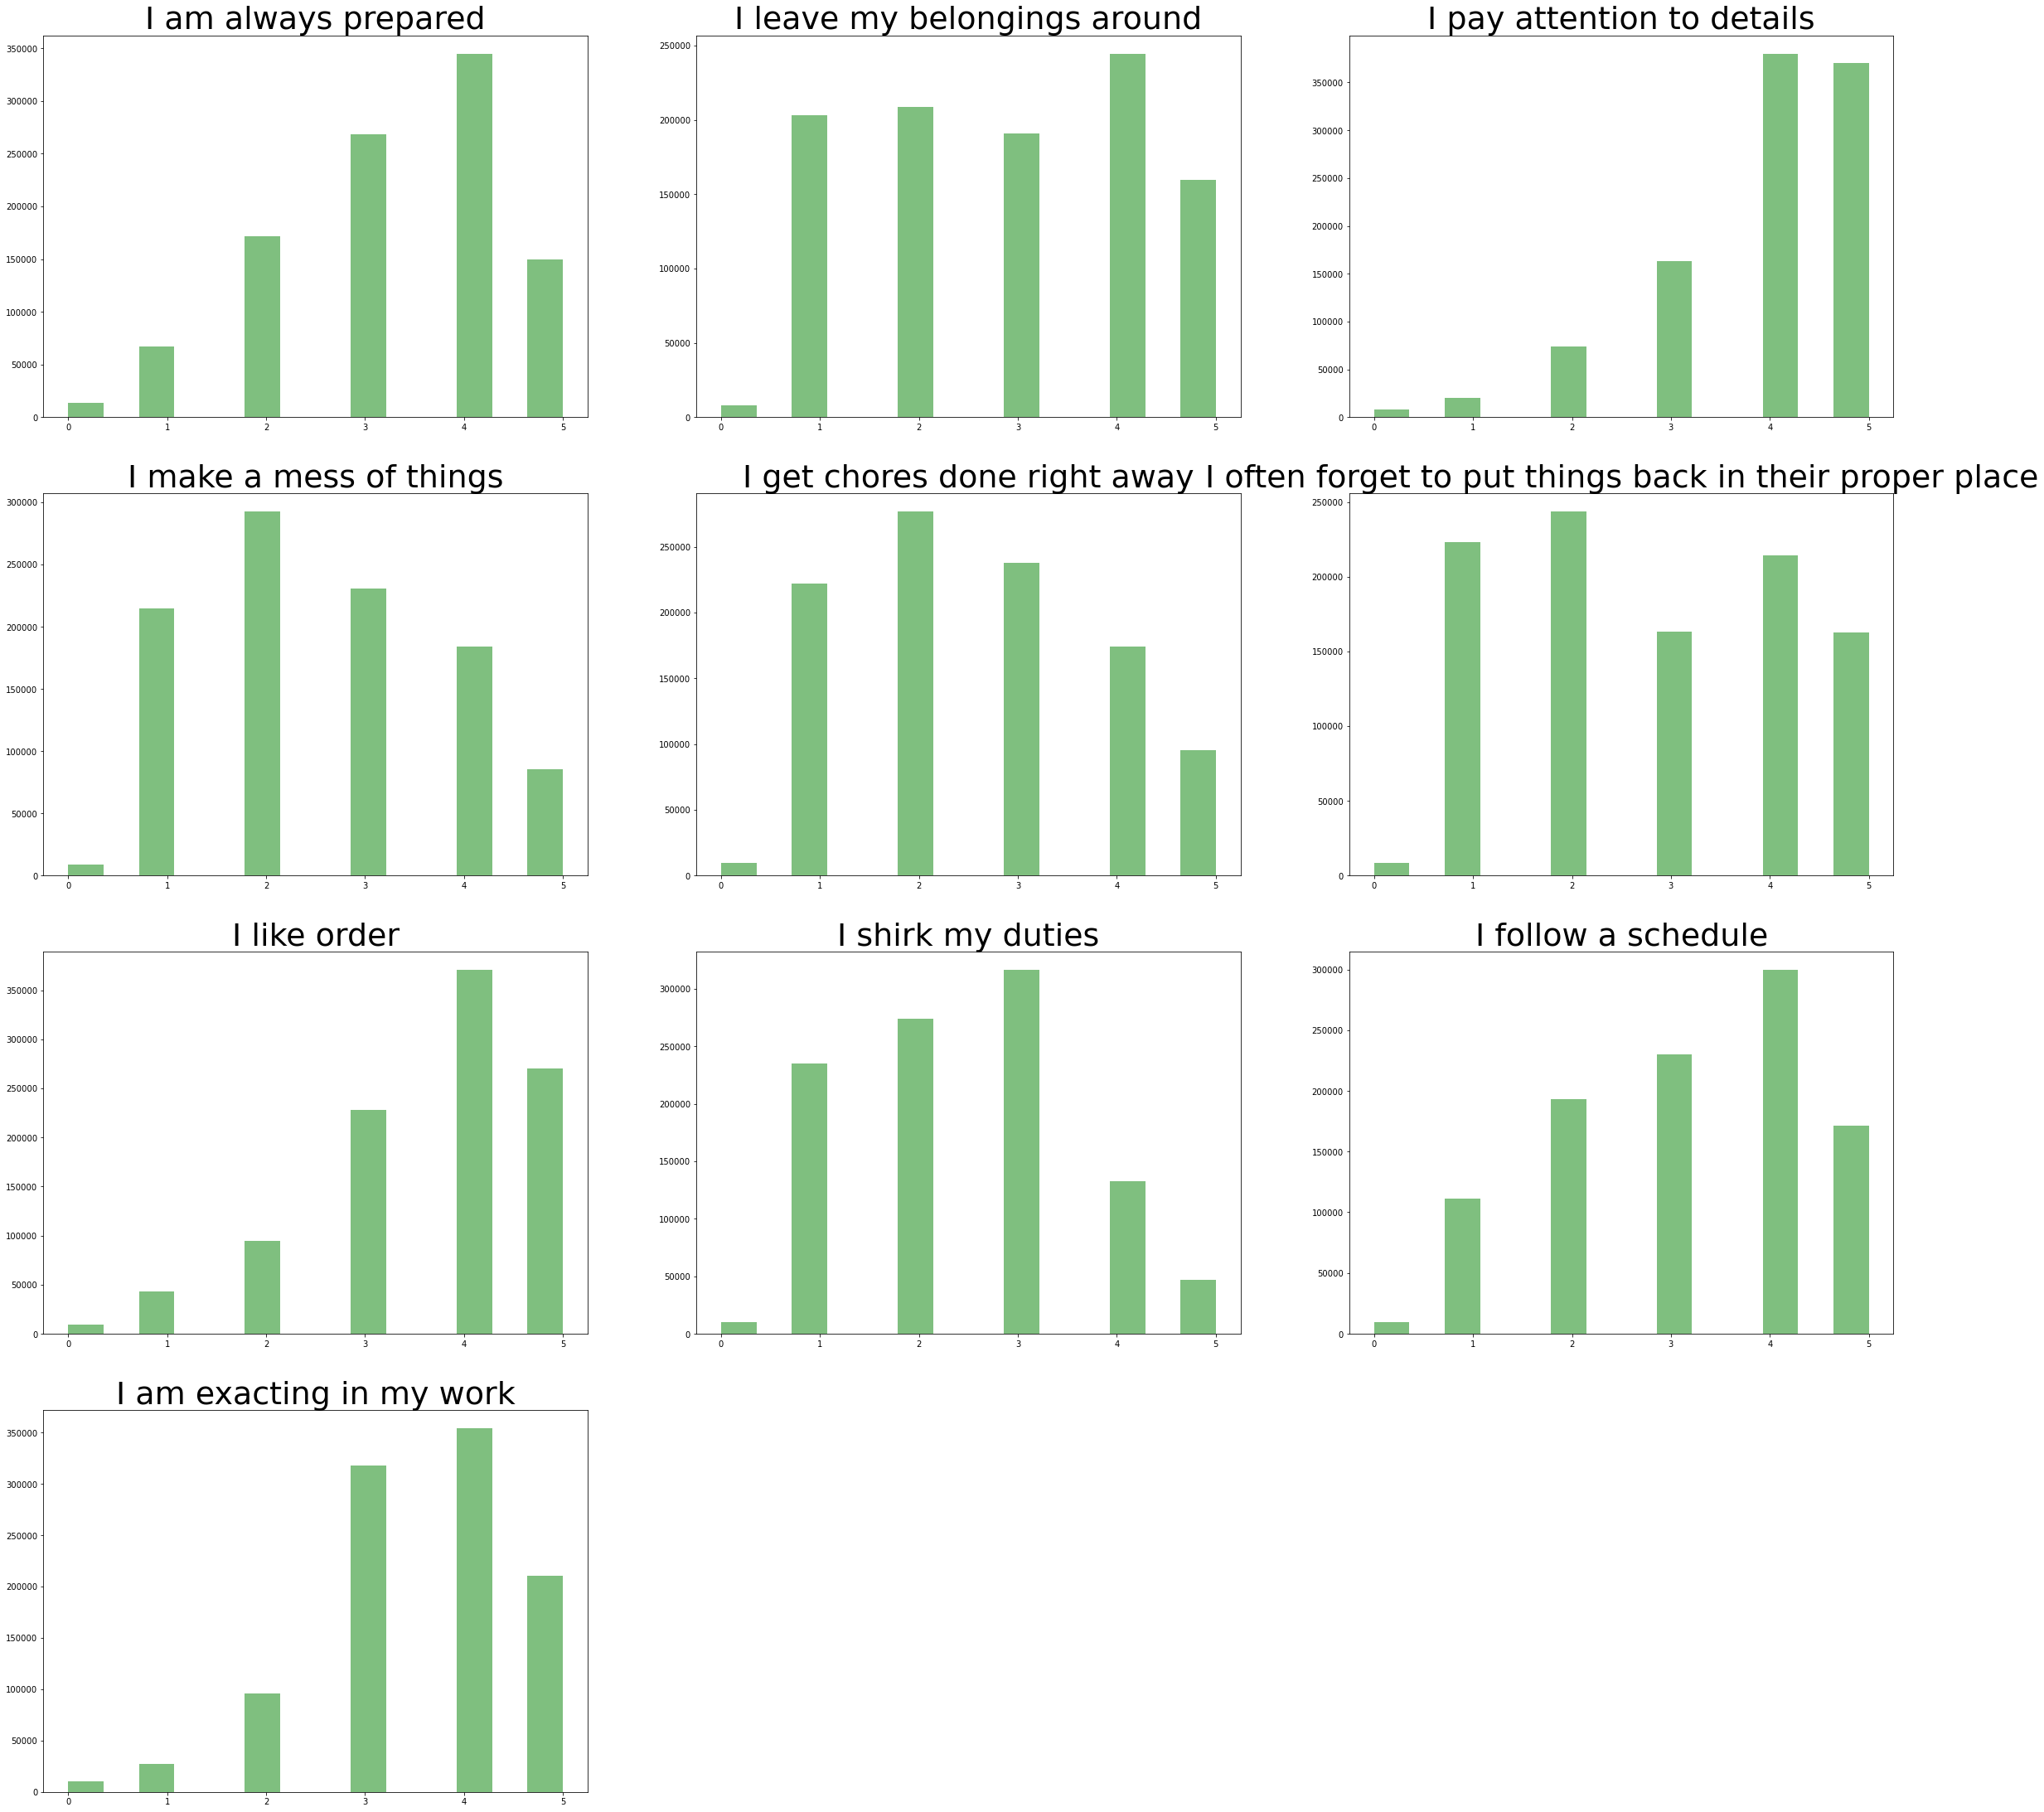

In [76]:
print('Conscientious')
results(CSN, conscientious, 'green')

Openness


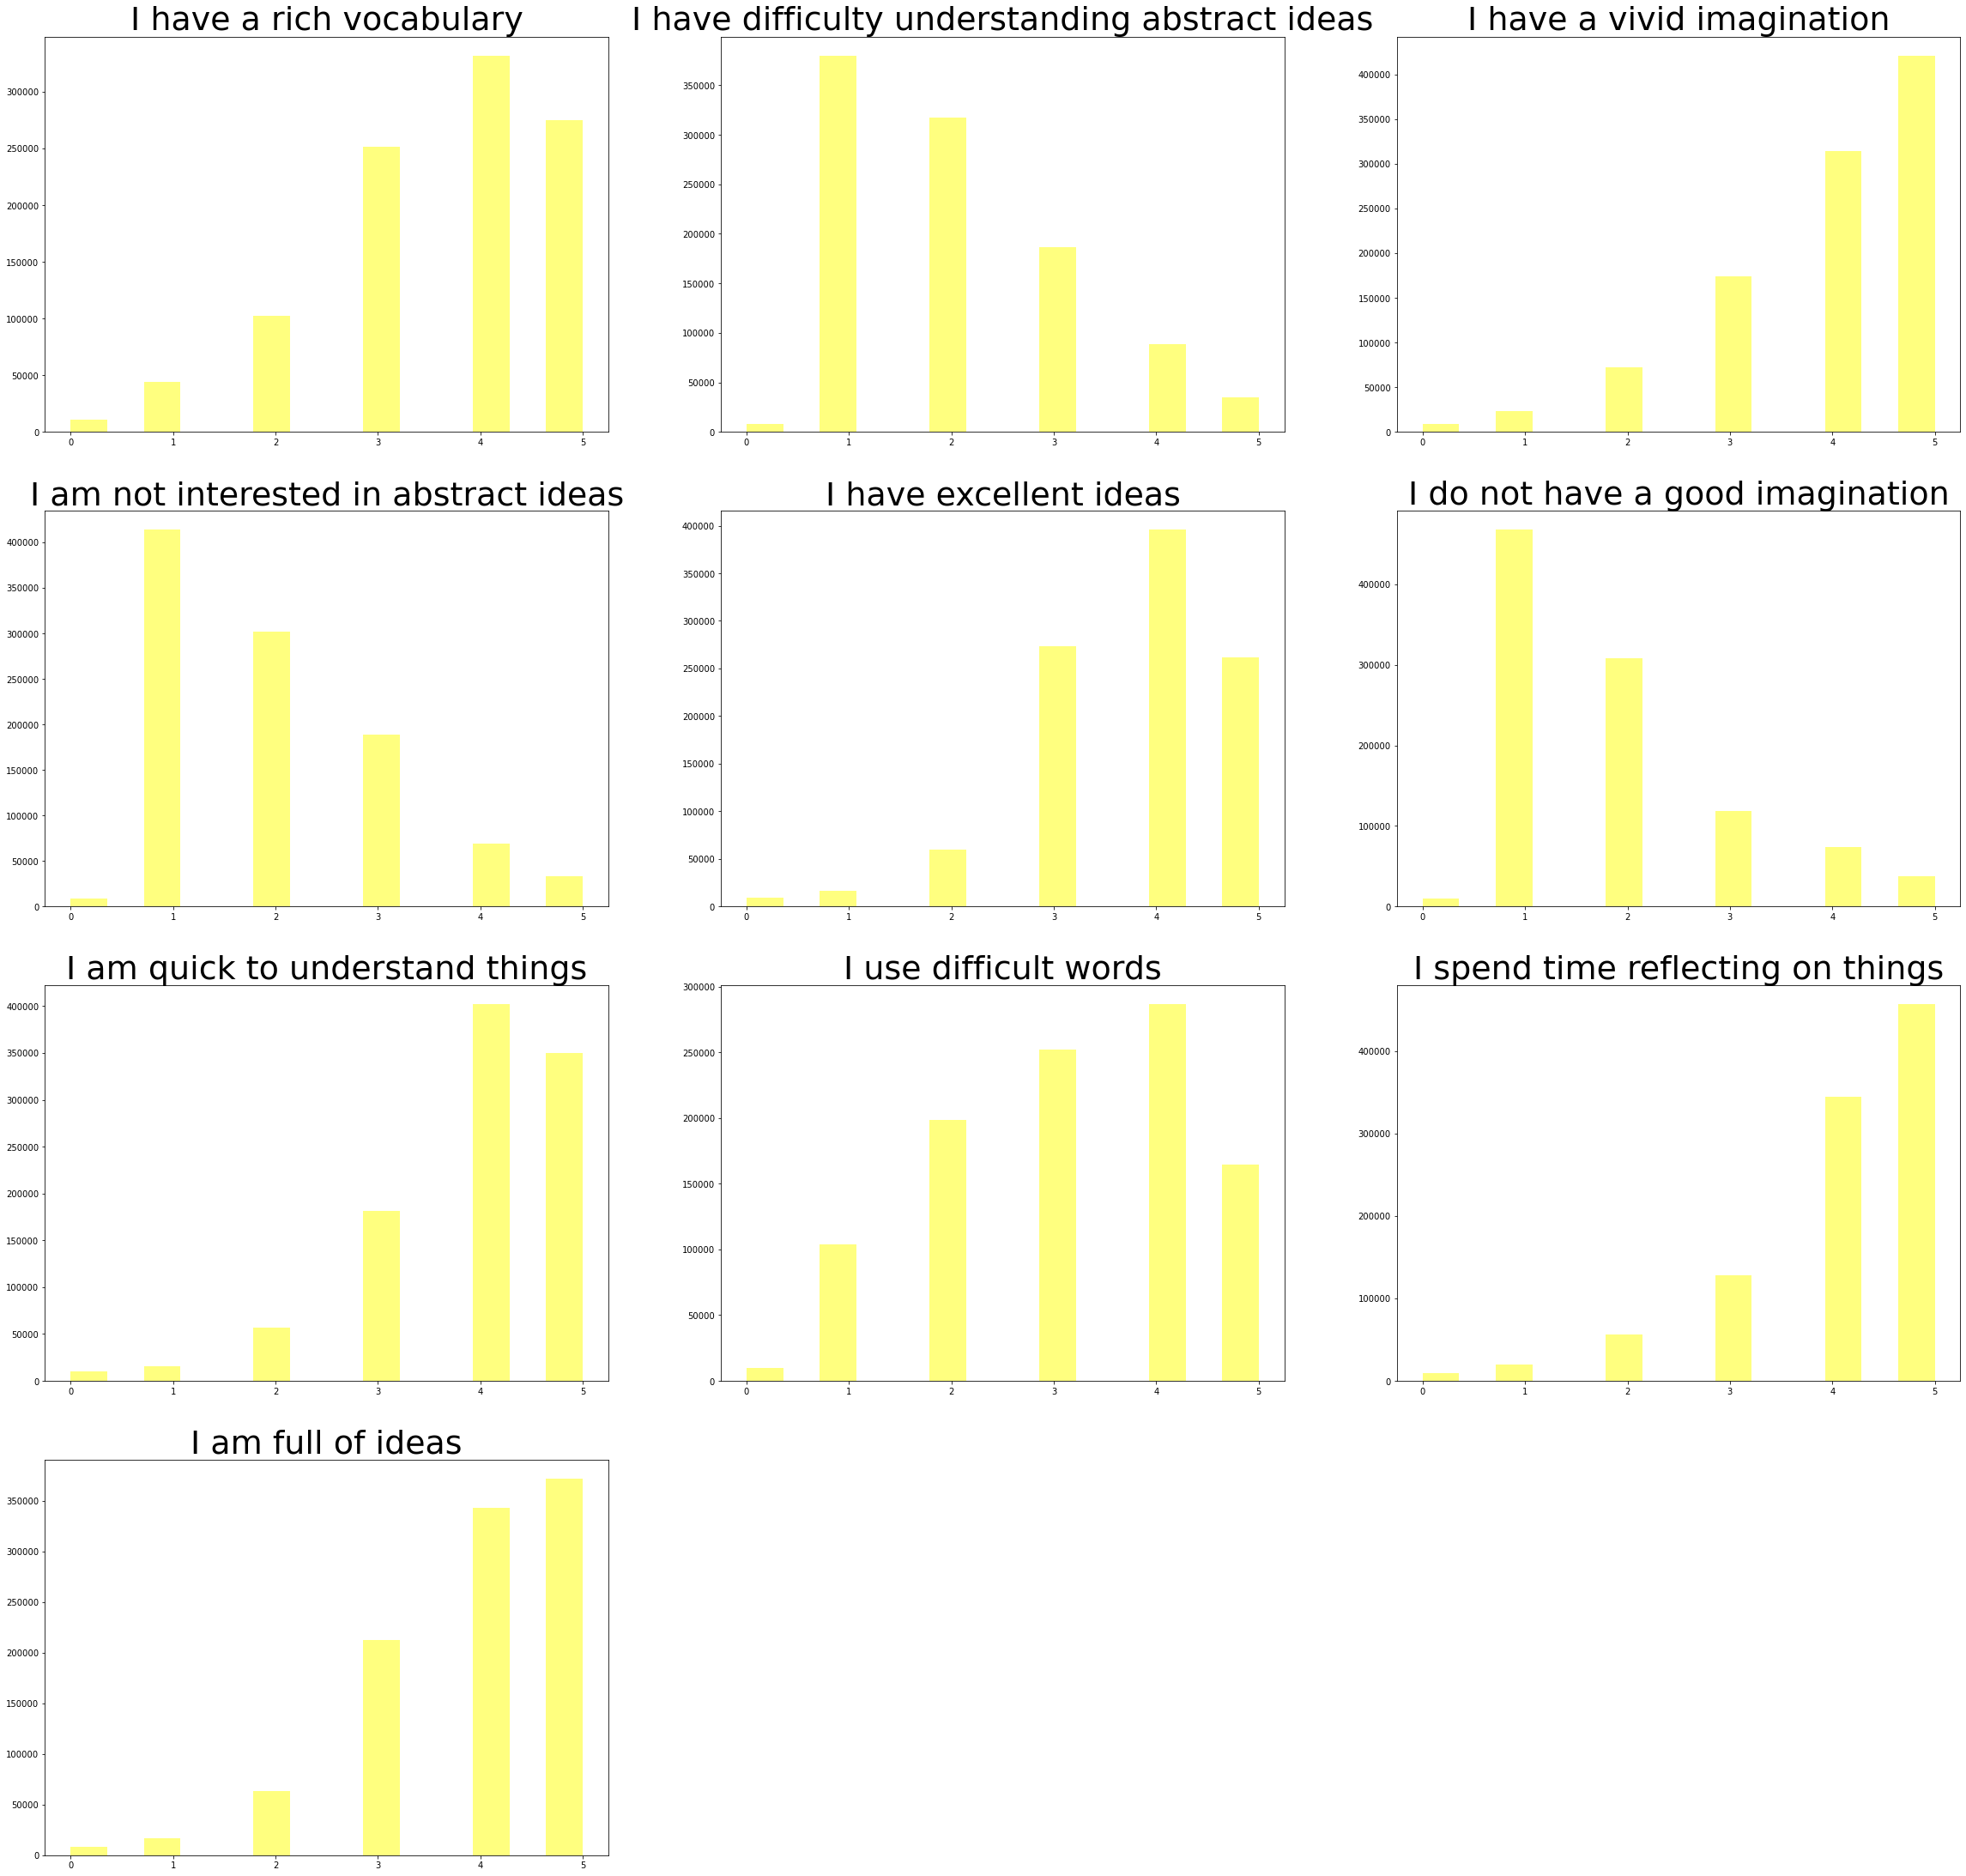

In [81]:
print('Openness')
results(OPN, openness, 'yellow')

### K-means Clustering

In [82]:
#import kmeans 
from sklearn.cluster import MiniBatchKMeans

#set clusters, batches and iteration fitted on cols
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0, batch_size=100, max_iter=100).fit(cols)

In [127]:
len(kmeans.cluster_centers_)

8

In [84]:
#Assign resulting clusters to variables
#personality types 1 through 8

one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three = kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five = kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]

The clusters represent predictions on how each the of personality types I defined would answer each of the questions in the dataset

In [86]:
one

array([1.9273008 , 3.43251539, 2.87866413, 3.84947675, 2.80142347,
       2.69509415, 1.99177871, 4.15594428, 2.13715019, 4.29303165,
       3.73717891, 2.85820963, 4.33397656, 2.40822847, 2.9060834 ,
       2.97093827, 3.01967366, 2.59012009, 3.11987291, 2.98336894,
       1.67861566, 3.9647723 , 1.65499291, 4.4530417 , 1.88771114,
       4.21991958, 1.960536  , 4.04550432, 4.27859053, 3.70647472,
       3.89031395, 2.20653754, 4.40350751, 2.04629414, 3.22602273,
       2.02212389, 4.26076576, 1.94747707, 3.87045181, 3.99143765,
       3.81397979, 1.92503904, 4.10244305, 1.86423199, 3.82521675,
       1.78926206, 4.12075248, 3.23394784, 4.44693856, 3.96952019])

In [87]:
two

array([1.72601872, 3.68427808, 2.1098859 , 4.12619708, 2.18446561,
       3.18677435, 1.65224748, 4.11241967, 2.12603039, 4.5253336 ,
       4.27527317, 2.40563765, 4.52368331, 2.04771668, 3.54060294,
       3.87286108, 4.0272631 , 3.81823486, 4.0447495 , 4.04601639,
       2.49870394, 3.26563815, 2.70426491, 3.72566032, 2.65071387,
       3.73385342, 2.81382575, 3.32780737, 3.55773094, 2.95363355,
       2.70233958, 3.49908734, 3.8161845 , 3.60130523, 1.93531368,
       3.63907851, 3.49302795, 3.14408355, 2.62203386, 3.27493978,
       3.653306  , 2.24860184, 4.16543728, 2.01816985, 3.49026913,
       1.98558081, 3.73918769, 3.33595879, 4.34580218, 3.83193726])

In [88]:
three

array([2.15121608, 3.41453437, 2.83679306, 3.56566841, 2.69440309,
       2.63375725, 2.12913321, 3.71077771, 2.81099455, 3.97392018,
       2.2168083 , 3.81260036, 3.00240286, 3.13812342, 2.17689738,
       1.90174061, 2.21691379, 1.81358495, 2.60192229, 2.22154369,
       3.10508117, 2.97413116, 2.70722616, 2.7454961 , 3.36844635,
       2.54876634, 3.18716521, 2.92361249, 2.60487605, 3.13398582,
       3.56993495, 2.73505245, 4.10703862, 2.19295552, 2.6179101 ,
       2.54425365, 3.8002227 , 2.33979957, 3.10218602, 3.8035281 ,
       4.16102678, 1.56238645, 4.0925863 , 1.73092657, 4.16252711,
       1.73696302, 4.41815624, 3.73688097, 4.1887593 , 4.22761531])

In [89]:
four

array([3.43497387, 1.97364992, 4.3616621 , 2.23958074, 4.26822181,
       1.6837259 , 3.8748957 , 2.87732576, 3.66151864, 2.53101257,
       2.36259168, 3.78444174, 3.20441803, 3.29050226, 2.08754813,
       1.8984717 , 2.06666569, 1.64414223, 2.0845691 , 1.68120069,
       1.83120581, 4.46075303, 1.70977588, 4.32657991, 1.78935311,
       3.93385399, 1.53529446, 4.15769788, 4.17678705, 4.24170339,
       3.86035924, 2.35606271, 4.28350485, 1.73854138, 3.35022178,
       2.04706416, 4.01320432, 1.81901158, 3.76601865, 3.94235189,
       3.84362694, 1.77826412, 4.04573934, 1.82173442, 4.14469851,
       1.66388283, 4.30895463, 3.14046054, 4.10018152, 4.27136918])

In [90]:
five

array([3.45396174, 1.86400302, 3.8919614 , 2.38314404, 4.08017914,
       1.65907681, 3.68250286, 2.66818644, 3.85940774, 2.8297857 ,
       3.31139108, 3.25729085, 3.93464987, 2.46022068, 2.88514492,
       2.91058534, 3.38234368, 2.94591775, 3.1289197 , 2.91397559,
       1.8860352 , 4.40385428, 2.54273793, 4.23659859, 1.88108021,
       3.92795928, 1.70242174, 3.92866071, 4.1323819 , 3.93874156,
       2.66261095, 4.04582693, 3.71341984, 3.35134576, 1.82502855,
       3.91387667, 3.08844345, 2.89081033, 2.48617369, 3.36211905,
       4.09215744, 1.68147768, 4.449933  , 1.59753959, 4.13042149,
       1.50995045, 4.16277731, 3.70584797, 4.29637323, 4.43117418])

In [91]:
six

array([2.38766111, 3.22008167, 3.14098967, 3.37247939, 2.85030189,
       3.08580718, 2.39131865, 3.60168557, 2.58734567, 3.83078531,
       2.94960715, 3.47078802, 3.53182452, 2.84719588, 2.80207648,
       2.52693811, 2.70611913, 2.29765453, 2.77018423, 2.43057437,
       2.6253435 , 3.48573751, 2.12272129, 3.68047761, 2.53624647,
       3.6265143 , 2.48348299, 3.44699462, 3.46665635, 3.30938189,
       2.99630375, 2.90060766, 3.50444131, 2.64592445, 2.51355614,
       2.95829624, 3.33928088, 2.66773426, 2.95634168, 3.15643264,
       2.75722801, 2.80699191, 3.22045903, 2.6759589 , 3.11964431,
       2.61869606, 3.4014785 , 2.31222665, 3.46495336, 3.11081008])

In [92]:
seven

array([0.79637462, 0.60624371, 0.48600201, 0.3407855 , 0.23947633,
       0.15065458, 0.12426989, 0.12165156, 0.12507553, 0.15850957,
       0.70191339, 0.50473313, 0.44572004, 0.25176234, 0.17724068,
       0.12024169, 0.11379658, 0.11581067, 0.13373615, 0.15669688,
       0.72286002, 0.67129909, 0.35448137, 0.34944612, 0.19456193,
       0.14783484, 0.11480363, 0.11701913, 0.1387714 , 0.13615307,
       0.75770393, 0.50050352, 0.47210473, 0.26445116, 0.18126888,
       0.11540785, 0.10896274, 0.11077543, 0.13152064, 0.1611279 ,
       0.65256798, 0.42598187, 0.4020141 , 0.22134945, 0.18509567,
       0.11379658, 0.11883182, 0.11782477, 0.13514602, 0.22799597])

In [93]:
eight

array([3.36172397, 2.09113341, 3.66291005, 2.712655  , 3.92964376,
       2.11782026, 3.5227678 , 2.97590511, 3.57926222, 3.24777091,
       4.21457305, 2.65722847, 4.4606229 , 2.54051756, 3.66054618,
       3.93822834, 4.10015344, 3.81762949, 4.11106042, 3.27912329,
       2.53550989, 4.05664994, 2.66620703, 4.08416622, 2.20126073,
       4.03239954, 2.10110729, 3.84142371, 4.08260067, 3.76789491,
       3.45470286, 2.86393232, 4.03685771, 2.87998175, 2.91460001,
       2.84737486, 3.98609671, 2.62639448, 3.63777838, 3.68161365,
       3.3124041 , 2.65615021, 3.96344296, 2.44797412, 3.76981296,
       2.10946377, 3.77178286, 2.94236511, 4.08351304, 3.90439804])

### Interpret the results

Now that we can see the traits each of the questions relates to, let's assign scores for these traits to understand these results better

**These scores will be calculated by adding to the score if the question represents the trait**

For example, "Life of the party" =+1 to Extroversion and "I don't talk alot" =-1 to Extroversion

In [95]:

all_types = {'one':one, 'two':two, 'three':three, 'four':four, 'five':five, 'six':six, 'seven':seven,
            'eight':eight}

all_types_scores = {}

for name, per_type in all_types.items():
    per_trait = {}
    
    
    per_trait['extroversion_score'] = per_type[0]-per_type[1]+per_type[2]-per_type[3]+per_type[4]-per_type[5]+per_type[6]-per_type[7]
    per_trait['neuroticism_score'] = per_type[0]-per_type[1]+per_type[2]-per_type[3]+per_type[4]+per_type[5]+per_type[6]+per_type[7]
    per_trait['agreeableness_score'] = -per_type[0]+per_type[1]-per_type[2]+per_type[3]-per_type[4]-per_type[5]+per_type[6]-per_type[7]
    per_trait['conscientiousness_score'] = per_type[0]-per_type[1]+per_type[2]-per_type[3]+per_type[4]-per_type[5]+per_type[6]-per_type[7]
    per_trait['openess_score'] = per_type[0]-per_type[1]+per_type[2]-per_type[3]+per_type[4]-per_type[5]+per_type[6]+per_type[7]
    
    all_types_scores[name] = per_trait

In [96]:
all_types_scores

{'one': {'extroversion_score': -4.533863469098309,
  'neuroticism_score': 9.168213394604091,
  'agreeableness_score': -5.184655980182713,
  'conscientiousness_score': -4.533863469098309,
  'openess_score': 3.7780250946884646},
 'two': {'extroversion_score': -7.437051484009709,
  'neuroticism_score': 7.161336567232594,
  'agreeableness_score': -3.8568416139491037,
  'conscientiousness_score': -7.437051484009709,
  'openess_score': 0.787787862876002},
 'three': {'extroversion_score': -3.5131922874054906,
  'neuroticism_score': 9.175877629959581,
  'agreeableness_score': -4.917611205532437,
  'conscientiousness_score': -3.5131922874054906,
  'openess_score': 3.9083631248901227},
 'four': {'extroversion_score': 7.165471153986873,
  'neuroticism_score': 16.287574475560277,
  'agreeableness_score': -8.537783080323786,
  'conscientiousness_score': 7.165471153986873,
  'openess_score': 12.920122674239844},
 'five': {'extroversion_score': 6.534194836377379,
  'neuroticism_score': 15.18872132444

To make these ranges standard and more interpretable let's normalize the data using the normalization formula on the range [0,1]

${x^j} = ({x^j - min^j}) / ({max^j - min^j})$

In [99]:
# append arrays of personality scores
all_ext = []
all_neuro = []
all_agree = []
all_consc = []
all_open = []

for per_type, per_trait in all_types_scores.items():
    
    all_ext.append(per_trait['extroversion_score'])
    all_neuro.append(per_trait['neuroticism_score'])
    all_agree.append(per_trait['agreeableness_score'])
    all_consc.append(per_trait['conscientiousness_score'])
    all_open.append(per_trait['openess_score'])

In [106]:
#use normalization formula
all_ext_norm = (all_ext-min(all_ext))/(max(all_ext)-min(all_ext))
all_neuro_norm = (all_neuro-min(all_neuro))/(max(all_neuro)-min(all_neuro))
all_agree_norm = (all_agree-min(all_agree))/(max(all_agree)-min(all_agree))
all_consc_norm = (all_consc-min(all_consc))/(max(all_consc)-min(all_consc))
all_open_norm = (all_open-min(all_open))/(max(all_open)-min(all_open))

In [107]:
all_ext_norm

array([0.19881414, 0.        , 0.26871105, 1.        , 0.95676937,
       0.33742588, 0.53852606, 0.82291146])

In [108]:
all_neuro_norm

array([0.53517368, 0.40414378, 0.53567408, 1.        , 0.92825538,
       0.6459709 , 0.        , 0.90071986])

In [109]:
all_agree_norm

array([0.42906719, 0.59897473, 0.46323833, 0.        , 0.0913723 ,
       0.31417038, 1.        , 0.10445863])

In [110]:
all_consc_norm

array([0.19881414, 0.        , 0.26871105, 1.        , 0.95676937,
       0.33742588, 0.53852606, 0.82291146])

In [111]:
all_open_norm

array([0.25370827, 0.00960791, 0.26434808, 1.        , 0.91432227,
       0.32844796, 0.        , 0.80499801])

In [113]:
# create a dictionary of the normalized scores
counter = 0

norm_all_type_score = {}

for per_type, per_trait in all_types_scores.items():
    norm_per_trait = {}
    
    norm_per_trait['extroversion_score'] = all_ext_norm[counter]
    norm_per_trait['neuroticism_score'] = all_neuro_norm[counter]
    norm_per_trait['agreeableness_score'] = all_agree_norm[counter]
    norm_per_trait['conscientiousness_score'] = all_consc_norm[counter]
    norm_per_trait['openess_score'] = all_open_norm[counter]
    
    norm_all_type_score[per_type] = norm_per_trait
    
    counter+=1

### Visualize Results

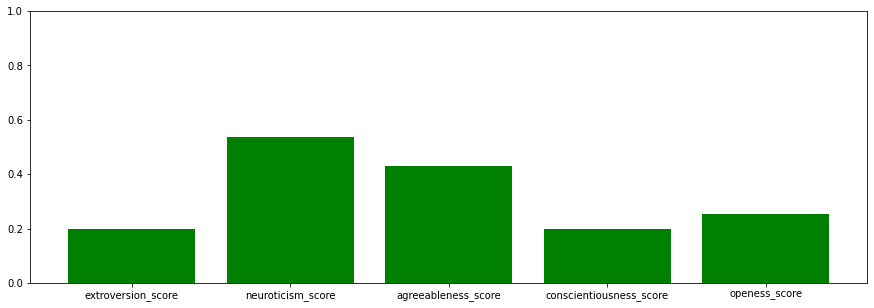

In [114]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['one'].keys()), norm_all_type_score['one'].values(), color='g')
plt.show()

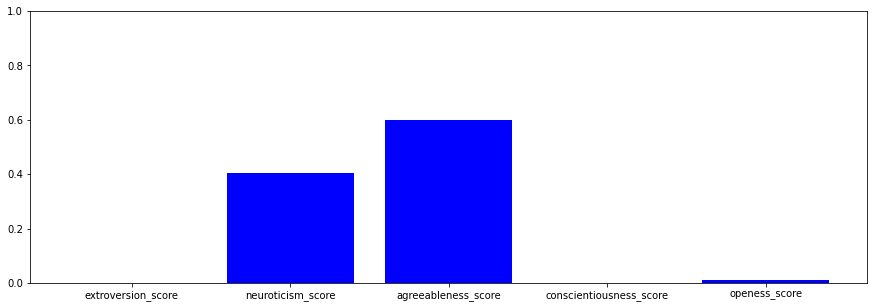

In [115]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['two'].keys()), norm_all_type_score['two'].values(), color='b')
plt.show()

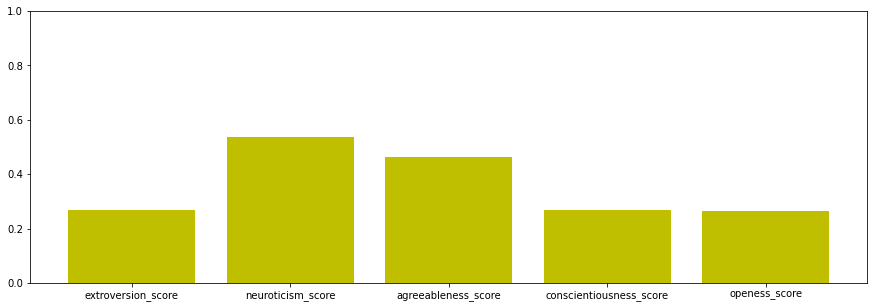

In [116]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['three'].keys()), norm_all_type_score['three'].values(), color='y')
plt.show()

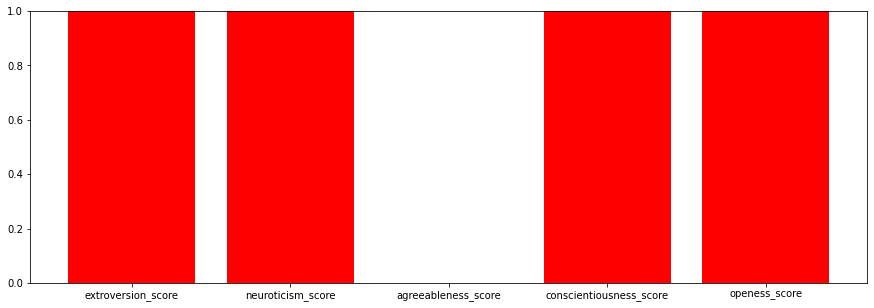

In [117]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['four'].keys()), norm_all_type_score['four'].values(), color='r')
plt.show()

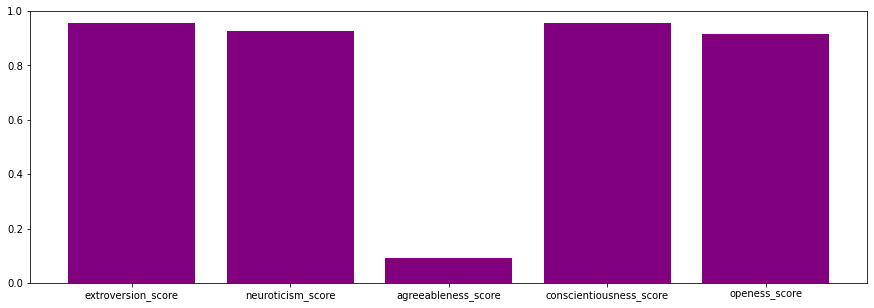

In [120]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['five'].keys()), norm_all_type_score['five'].values(), color='purple')
plt.show()

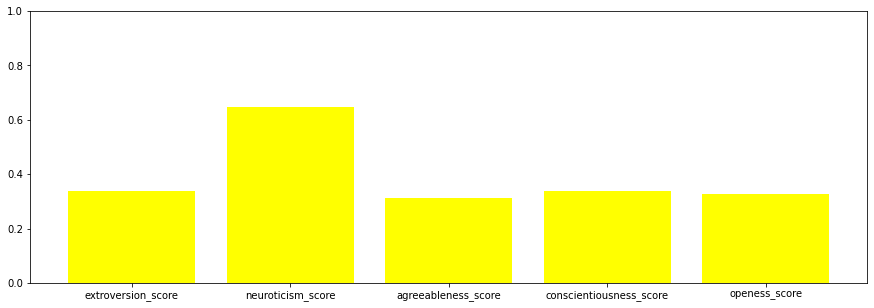

In [121]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['six'].keys()), norm_all_type_score['six'].values(), color='yellow')
plt.show()

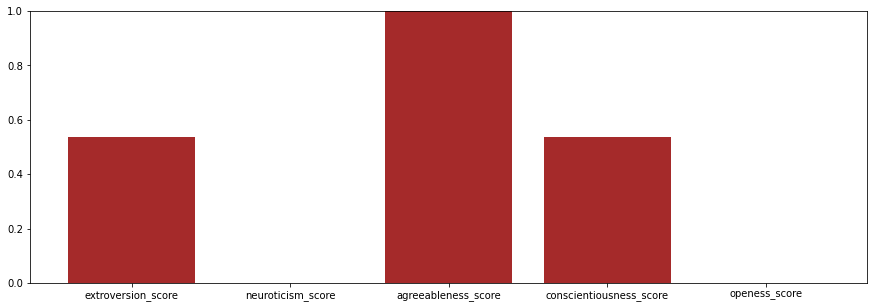

In [122]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['seven'].keys()), norm_all_type_score['seven'].values(), color='brown')
plt.show()

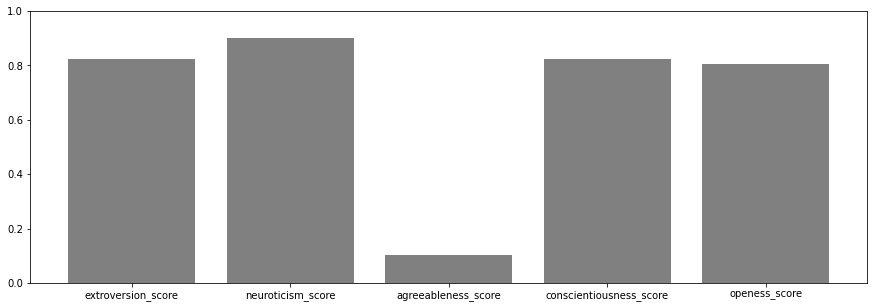

In [123]:
plt.figure(figsize=(15,5))
plt.ylim(0,1)
plt.bar(list(norm_all_type_score['eight'].keys()), norm_all_type_score['eight'].values(), color='gray')
plt.show()